<a href="https://colab.research.google.com/github/Laser57/MNA_EQUIPO27/blob/main/Arboldedecision_Equipo27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Luis Alfonso Sabanero Esquivel A01273286
*   José Antonio Mendoza Castro    A01794067
*   Alan Avelino Fernández Juárez  A00989308
*   Miguel Angel Paredes Gutierrez A01794138
*   Fernando Sebastián Sánchez Cardona A01687530


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import GridSearchCV

from sklearn import tree
import pydotplus 
from IPython.display import Image
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')


#**Ejercicio-1.** 

In [ ]:
df = pd.read_csv('SouthGermanCredit.asc', sep=' ')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
df.rename(columns = {
    'laufkont':'status', #categorical
    'laufzeit':'duration', #quantitative
    'moral':'credit_history', #categorical
    'verw':'purpose', #categorical
    'hoehe':'amount', #quantitative
    'sparkont':'savings',#categorical
    'beszeit':'employment_duration', #ordinal
    'rate':'installment_rate', #ordinal
    'famges':'personal_status_sex', #categorical
    'buerge':'other_debtors', #categorical
    'wohnzeit':'present_residence', #ordinal
    'verm':'property', #ordinal
    'alter':'age', #quantitative
    'weitkred':'other_installment_plans', #categorical
    'wohn':'housing', #categorical
    'bishkred':'number_credits', #ordinal
    'beruf':'job', #ordinal
    'pers':'people_liable', #binary
    'telef':'telephone', #binary
    'gastarb':'foreign_worker', #binary
    'kredit':'credit_risk' #binary
}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

Grafico de exploración de variables del dataset

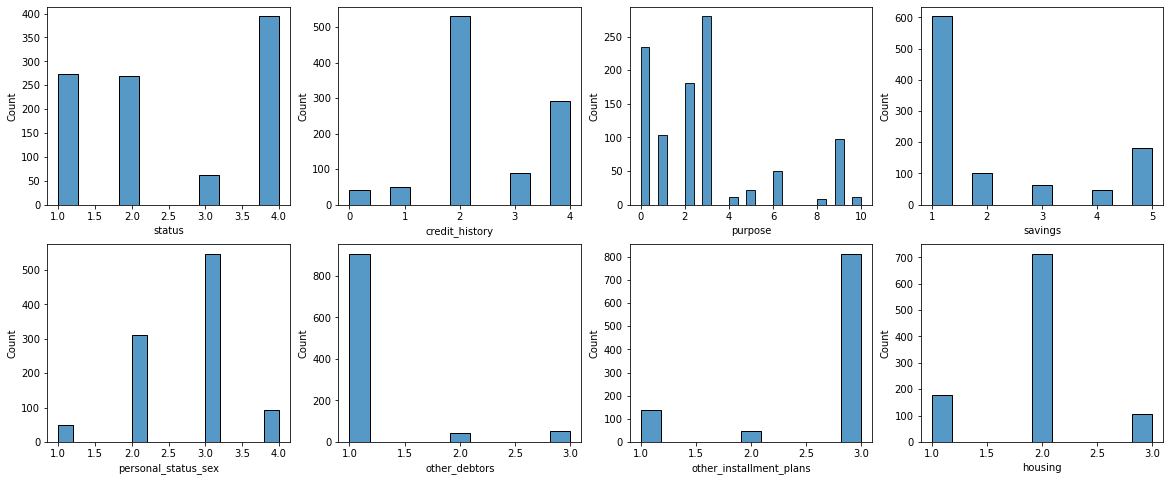

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,8))

sns.histplot(data=df, x='status', ax=ax[0, 0])
sns.histplot(data=df, x='credit_history', ax=ax[0, 1])
sns.histplot(data=df, x='purpose', ax=ax[0, 2])
sns.histplot(data=df, x='savings', ax=ax[0, 3])

sns.histplot(data=df, x='personal_status_sex', ax=ax[1, 0])
sns.histplot(data=df, x='other_debtors', ax=ax[1, 1])
sns.histplot(data=df, x='other_installment_plans', ax=ax[1, 2])
sns.histplot(data=df, x='housing', ax=ax[1, 3])

plt.show()

#**Ejercicio-2.**

In [ ]:
X=df.iloc[:,0:20] #Todas menos el credit_risk
y=df["credit_risk"] #Para la de salida

In [ ]:
X_train, X_val, y_train, y_val= train_test_split(X, y, train_size=0.85, random_state=10)

In [ ]:
y_train.sum() / y_train.shape[0]
#Dataset desbalanceado 

0.7082352941176471

In [ ]:
y.value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

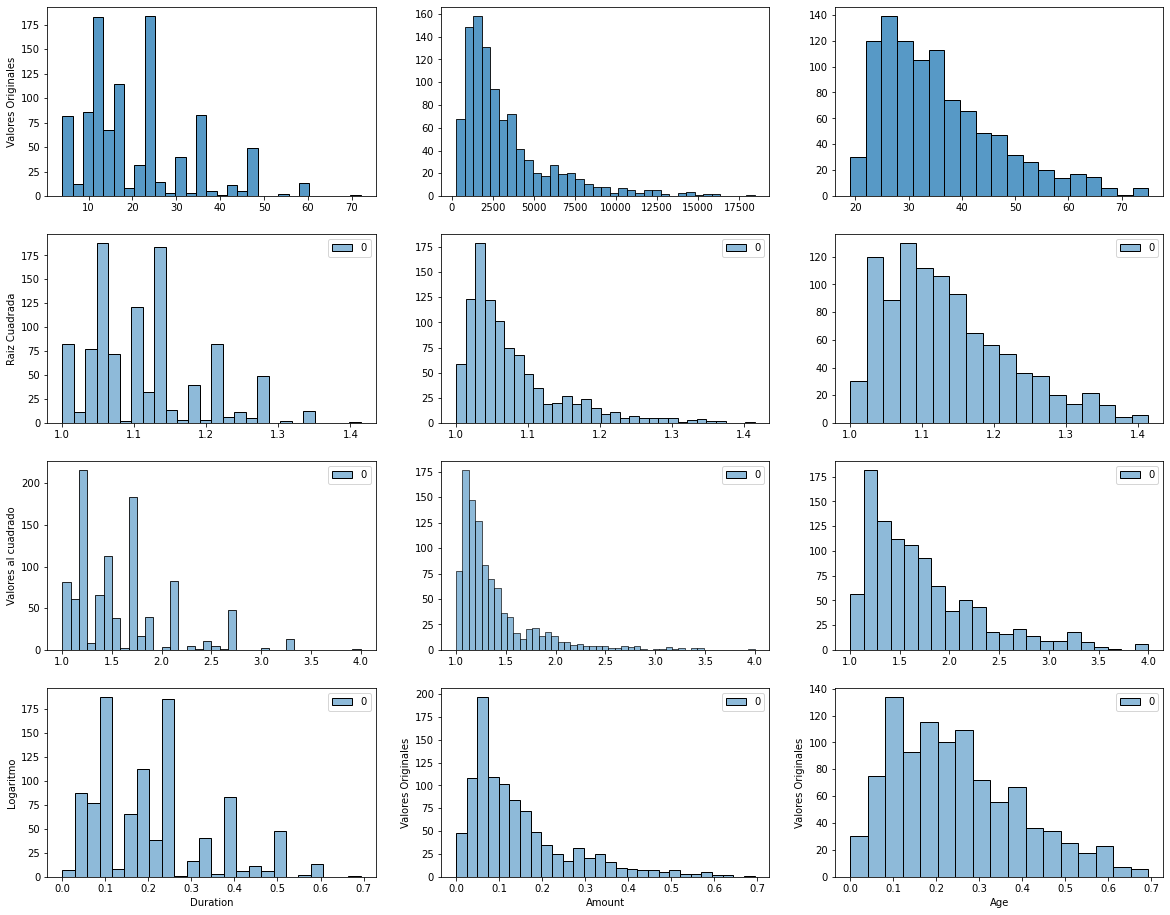

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,16))

scaler = MinMaxScaler(feature_range=(1,2))

sns.histplot(X['duration'], ax=ax[0, 0])
ax[0, 0].set(xlabel=None, ylabel='Valores Originales')
sns.histplot(X['amount'], ax=ax[0, 1])
ax[0, 1].set(xlabel=None, ylabel=None)
sns.histplot(X['age'], ax=ax[0, 2])
ax[0, 2].set(xlabel=None, ylabel=None)

sns.histplot(np.sqrt(scaler.fit_transform(np.array(X['duration']).reshape(-1, 1))), ax=ax[1, 0])
ax[1, 0].set(xlabel=None, ylabel='Raiz Cuadrada')
sns.histplot(np.sqrt(scaler.fit_transform(np.array(X['amount']).reshape(-1, 1))), ax=ax[1, 1])
ax[1, 1].set(xlabel=None, ylabel=None)
sns.histplot(np.sqrt(scaler.fit_transform(np.array(X['age']).reshape(-1, 1))), ax=ax[1, 2])
ax[1, 2].set(xlabel=None, ylabel=None)

sns.histplot(np.power(scaler.fit_transform(np.array(X['duration']).reshape(-1, 1)), 2), ax=ax[2, 0])
ax[2, 0].set(xlabel=None, ylabel='Valores al cuadrado')
sns.histplot(np.power(scaler.fit_transform(np.array(X['amount']).reshape(-1, 1)), 2), ax=ax[2, 1])
ax[2, 1].set(xlabel=None, ylabel=None)
sns.histplot(np.power(scaler.fit_transform(np.array(X['age']).reshape(-1, 1)), 2), ax=ax[2, 2])
ax[2, 2].set(xlabel=None, ylabel=None)

sns.histplot(np.log(scaler.fit_transform(np.array(X['duration']).reshape(-1, 1))), ax=ax[3, 0])
ax[3, 0].set(xlabel='Duration', ylabel='Logaritmo')
sns.histplot(np.log(scaler.fit_transform(np.array(X['amount']).reshape(-1, 1))), ax=ax[3, 1])
ax[3, 1].set(xlabel='Amount', ylabel='Valores Originales')
sns.histplot(np.log(scaler.fit_transform(np.array(X['age']).reshape(-1, 1))), ax=ax[3, 2])
ax[3, 2].set(xlabel='Age', ylabel='Valores Originales')

plt.show()

De acuerdo a los primeros análisis al dataset y al resultado de la celda anterior, se puede notar que la información compartida tiene un desbalance en la variable de salida.

In [ ]:
#Propuesta de agrupamiento
df_agrupado=X_train.copy()
df_agrupado['status'] = df_agrupado['status'].map({1: 1, 2: 2, 4: 4, 3: 4})
df_agrupado['credit_history'] = df_agrupado['credit_history'].map({0: 1, 1: 0, 2: 2, 3: 3, 4: 4})
df_agrupado['purpose'] = df_agrupado['purpose'].map({0: 0, 1: 1, 2: 2, 3: 3, 4: 0, 5: 0, 6: 6, 8: 0, 9: 9, 10: 0})
df_agrupado['savings'] = df_agrupado['savings'].map({1: 1, 2: 2, 3: 3, 4: 3, 5: 5})
df_agrupado['other_debtors'] = df_agrupado['other_debtors'].map({1: 1, 2: 2, 3: 2})
df_agrupado['other_installment_plans'] = df_agrupado['other_installment_plans'].map({1: 1, 2: 1, 3: 3})

df_agrupado.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
548,2,12,2,0,1007,3,3,4,4,1,1,1,22,3,2,1,3,2,1,2
335,1,24,2,2,1747,1,2,4,3,2,1,2,24,3,2,1,2,2,1,1
793,1,12,2,6,795,1,2,4,2,1,4,2,53,3,2,1,3,2,1,2
848,2,36,2,3,2671,2,3,4,2,2,4,4,50,3,3,1,3,2,1,2
295,4,36,2,1,8133,1,3,1,2,1,2,2,30,1,2,1,3,2,1,2


<AxesSubplot:xlabel='housing', ylabel='Count'>

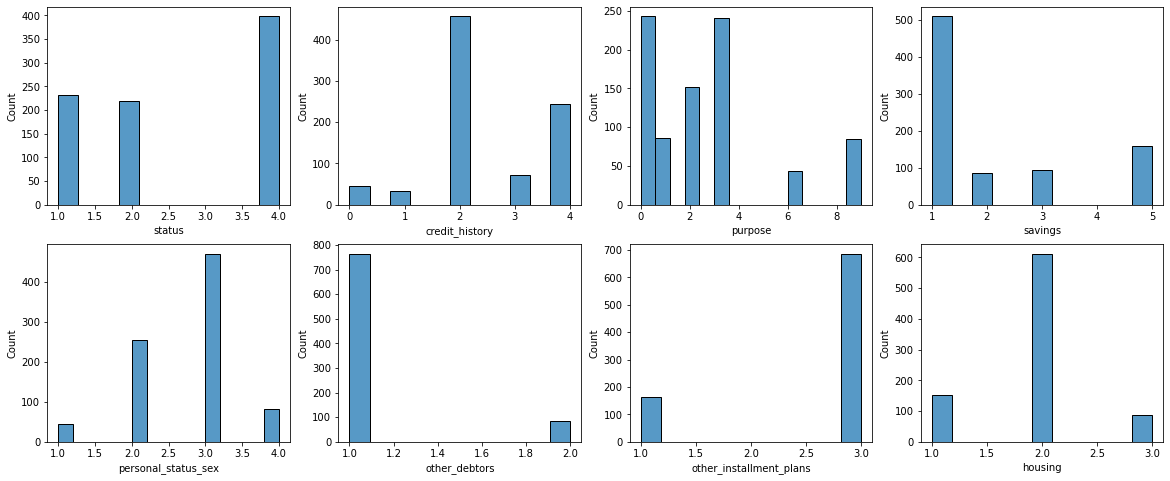

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,8))

sns.histplot(data=df_agrupado, x='status', ax=ax[0, 0])
sns.histplot(data=df_agrupado, x='credit_history', ax=ax[0, 1])
sns.histplot(data=df_agrupado, x='purpose', ax=ax[0, 2])
sns.histplot(data=df_agrupado, x='savings', ax=ax[0, 3])

sns.histplot(data=df_agrupado, x='personal_status_sex', ax=ax[1, 0])
sns.histplot(data=df_agrupado, x='other_debtors', ax=ax[1, 1])
sns.histplot(data=df_agrupado, x='other_installment_plans', ax=ax[1, 2])
sns.histplot(data=df_agrupado, x='housing', ax=ax[1, 3])


#**Ejercicio-3.**

In [ ]:
categorical= ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']
ordinal=['employment_duration','installment_rate','present_residence','property','number_credits','job']
quantitative=['duration','amount','age']
binary=['people_liable','telephone','foreign_worker']

In [ ]:
#consultar actividad semana 2, se opta por transformar logaritmo porque deja la camapana de mejor forma
#categoricas aunque no estan vacias por precaucion aquellas vacias que se ponga la moda
#numericas que se rellene con la media de momento, minmax scaler para escalar todas al mismo rango
# Transformaciones a factores numéricos de entrada:
quantitative_pipeline = Pipeline(steps = [('impMean', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2))),
                                 ('log',FunctionTransformer(np.log))])   
quantitative_pipeline_nombres = quantitative

# Transformaciones a factores categóricos de entrada:
categorical_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                ('OneHotE', OneHotEncoder(handle_unknown="ignore"))])  
categorical_pipeline_nombres = categorical

catOHE_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                ('OneHotE', OneHotEncoder(handle_unknown="ignore",drop="first"))])
catOHE_pipeline_nombres = binary


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', quantitative_pipeline, quantitative_pipeline_nombres),
                                                        ('catimp', categorical_pipeline, categorical_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

### Justificación tipo de imputación 
Para el caso de las variables cuantitativas consideramos usar la media, debido a que no detectamos muchos outlayers es una metrica aceptable que no provocaria un sesgo a la infomacion como lo haria la moda por ejemplo. 
Elegimos scalar los valores cuantitativos, decidimos usar el minmaxscaler de un rango entre 1-2 que nos va a ayudar a poder emplear el logaritmo adecuadamente para el modelo

Para las variables categoricas y binarias decidimos el usar el valor de la moda debido a que nos resulta poco practico el insertar un valor como la media o la mediana sin producir un sesgo o romper la clasificación

Considerando las graficas anteriores, podemos observar que la transformación logaritmica fue la que mejor distribuyo los datos hacia el centro, en forma de campana.


### Justificación por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding

Aunque el valor de una columna binaria solo comprende dos valores, el one hote enconding genera de K categorias K columnas, para evitar un problema de colinealidad entre las variables del dataset es mejor eliminar una de las columnas y mantener K-1 catagorias.

Nota: Se sugiere aplicar un trabajo de agrupamiento sobre las variables categoricas para simplificar el trabajo del OneHotEncoder, como el realizado previamente, sin embargo se opto trabajar con los sin agrupar

#**Ejercicio-4.**

In [ ]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(max_iter=10000))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  # RF - RANDOM FOREST:
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  
  return modelos, nombres

def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

  
def mi_recall(yreal, ypred):
  #VP/VP+FN
  cm = confusion_matrix(yreal, ypred) #Primero yreal, segundo pred
  VP=cm[1][1]
  FN=cm[1][0]

  return VP/(VP+FN)

def mi_f1(yreal, ypred):
  #2vp / 2vp+fp+fn
  cm = confusion_matrix(yreal, ypred)
  VP=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]
  return 2*VP/(2*VP+FN+FP)

def mi_gmean(yreal, ypred):
  cm=confusion_matrix(yreal,ypred)
  recall=mi_recall(yreal, ypred)
  especifidad= cm[0][0] /(cm[0][0]+cm[0][1])
  gmean = np.sqrt(recall*especifidad)

  return gmean

In [ ]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=10) #RANDOM STATE PARA DEBUGEAR 

  mismetricas =  {"accuracy": make_scorer(mi_accuracy),
                  "precision": make_scorer(mi_precision),
                  'F1':make_scorer(mi_f1), 
                  'recall':make_scorer(mi_recall),
                  'gmean':make_scorer(mi_gmean)}

  scores = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=cv,return_train_score=True)

  resultados.append(scores)

  print('%s:\nAccuracy: %.3f (%.4f)\nPrecision: %.3f (%.4f)\nRecall: %.3f (%.4f)\nF1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['test_accuracy']),
                                                                          np.std(scores['test_accuracy']), 
                                                                          np.mean(scores['test_precision']),
                                                                          np.std(scores['test_precision']), 
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),
                                                                          np.mean(scores['test_F1']),
                                                                          np.std(scores['test_F1']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean'])
                                                                          ))
  print('%s:\ntrain Accuracy: %.3f (%.4f)\ntrain Precision: %.3f (%.4f)\ntrain Recall: %.3f (%.4f)\ntrain F1score: %.3f (%.4f)\ntrain Gmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['train_accuracy']),
                                                                          np.std(scores['train_accuracy']), 
                                                                          np.mean(scores['train_precision']),
                                                                          np.std(scores['train_precision']), 
                                                                          np.mean(scores['train_recall']),
                                                                          np.std(scores['train_recall']),
                                                                          np.mean(scores['train_F1']),
                                                                          np.std(scores['train_F1']),
                                                                          np.mean(scores['train_gmean']),
                                                                          np.std(scores['train_gmean'])
                                                                          ))                                                                    

LR:
Accuracy: 0.765 (0.0340)
Precision: 0.804 (0.0253)
Recall: 0.885 (0.0310)
F1score: 0.842 (0.0235)
Gmean: 0.647 (0.0538)

LR:
train Accuracy: 0.791 (0.0083)
train Precision: 0.818 (0.0071)
train Recall: 0.907 (0.0068)
train F1score: 0.860 (0.0054)
train Gmean: 0.680 (0.0150)

DT:
Accuracy: 0.673 (0.0218)
Precision: 0.775 (0.0171)
Recall: 0.758 (0.0325)
F1score: 0.766 (0.0180)
Gmean: 0.592 (0.0376)

DT:
train Accuracy: 1.000 (0.0000)
train Precision: 1.000 (0.0000)
train Recall: 1.000 (0.0000)
train F1score: 1.000 (0.0000)
train Gmean: 1.000 (0.0000)

RF:
Accuracy: 0.764 (0.0221)
Precision: 0.786 (0.0157)
Recall: 0.916 (0.0254)
F1score: 0.846 (0.0151)
Gmean: 0.598 (0.0408)

RF:
train Accuracy: 1.000 (0.0000)
train Precision: 1.000 (0.0000)
train Recall: 1.000 (0.0000)
train F1score: 1.000 (0.0000)
train Gmean: 1.000 (0.0000)



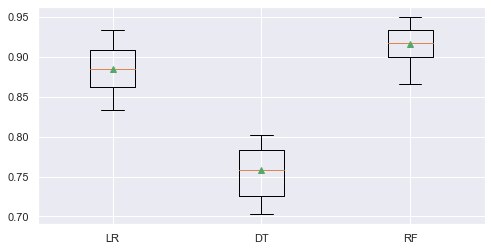

In [ ]:
#Diagrama de caja
sns.set(rc={'figure.figsize':(8,4)})

bprecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bprecall.append(rr)

plt.boxplot(bprecall, labels=nombres, showmeans=True)

plt.show()

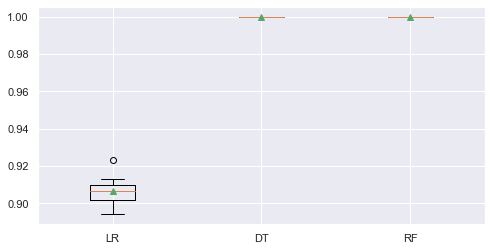

In [ ]:
#Diagrama de caja
sns.set(rc={'figure.figsize':(8,4)})

bprecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['train_recall']
  bprecall.append(rr)

plt.boxplot(bprecall, labels=nombres, showmeans=True)

plt.show()

### ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta.

Considerando los parámetros por defecto de los siguientes modelos Regresión logistica, árbol de decisión y random forest, los siguientes modelos están sobreentrenados:
* Árbol de decisión
* Random forest
Esta decisión la tomamos, debido a que los resultados obtenidos con las métricas corresponden a un valor cercano a 1 y a la par cuando revisamos las gráficas los modelos generados representa una alta varianza, por lo que está aprendiendo todo el set de entrenamiento.

Consideramos que el modelo de regresión logística no presenta un sub-entrenamiento ni un sobre-entrenamiento por lo que está generalizando bien la información de entrenamiento.


In [ ]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,metrica):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(10,10))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(metrica)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

def mi_validationCurvePlot(train_scores,valid_scores,param,metrica):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)



    plt.plot(param, train_mean, color='blue', marker='o', markersize=5, label='Training')

    # Curva de validación:
    plt.plot(param, valid_mean, color='red', marker='o', markersize=5, label='Validation')

    plt.title('Función validation_curve()')
    plt.xlabel('Valores de funcion learning curve')
    plt.ylabel(metrica)
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    return 

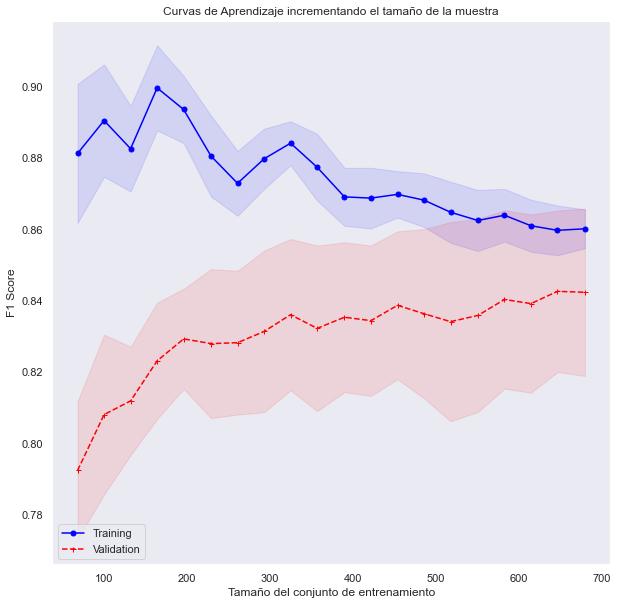

In [ ]:

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[0])])

delta_train_sz = np.linspace(0.1,1,20)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=10) #RANDOM STATE PARA DEBUGEAR 
metrica="F1 Score"
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                 X = X_train,
                                                 y = y_train,
                                                 cv = cv ,
                                                 scoring=make_scorer(mi_f1),
                                                 train_sizes = delta_train_sz ,
                                                 random_state=10)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,metrica)

### Conclusión modelo generado Regresión logistica

Este modelo de regresión logistica presenta una buena generalización del set de entrenamiento. Presenta una reducción gradual de la varianza generada por lo que se descarta que este sobre entrenado y además dependiendo de la regla de negocio cual es el desempeño optimo podemos considerar que el modelo no presenta subentrenamiento. 
Concluimos que este es el mejor modelo generado sin recurrir al uso de los hiperparámetros.

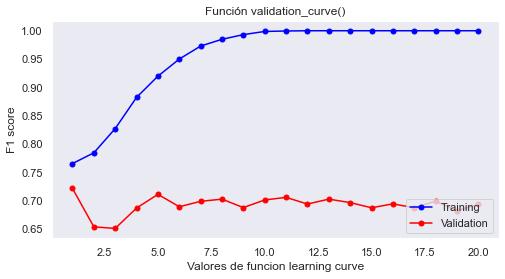

In [ ]:
max_depth = np.linspace(1,20,20, dtype="int")
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[1])])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11) #RANDOM STATE PARA DEBUGEAR 
metrica="F1 score"
train_scores, valid_scores = validation_curve(pipeline, 
                                              X_val, 
                                              y_val, 
                                              param_name="m__max_depth", 
                                              param_range=max_depth,
                                              cv=cv,
                                              scoring=make_scorer(mi_f1))

mi_validationCurvePlot(train_scores,valid_scores,max_depth,metrica)

### Conclusión modelo generado Árbol de decisiones
El modelo se descartaría debido a un sobreentramiento, como lo podemos ver por su alta varianza entre los conjuntos de entrenamiento y validación.
Consideramos necesaria la intervención de los hiperparámetros para poder obtener una mejor métrica y comportamiento de su curva de validación.

Concluimos que este modelo no es óptimo para ser elegido sobre los resultados obtenidos del modelo de regresión logística, por lo tanto se descarta de los modelos propuestos.

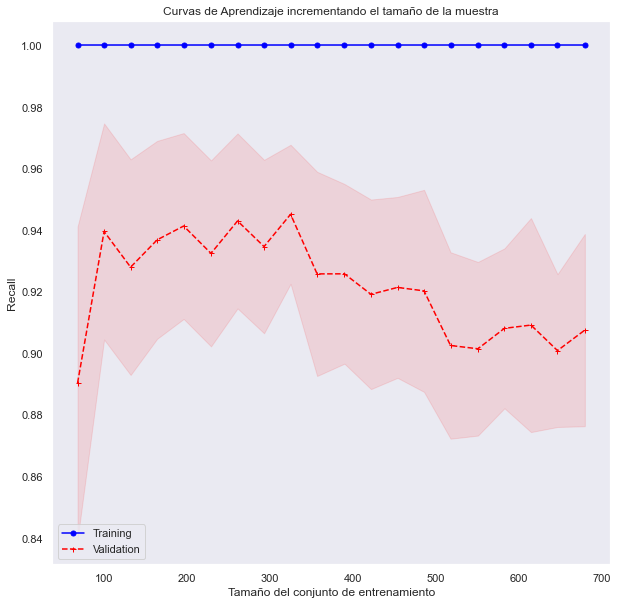

In [ ]:
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[2])])

delta_train_sz = np.linspace(0.1,1,20)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11) #RANDOM STATE PARA DEBUGEAR 
metrica="Recall"
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                 X = X_train,
                                                 y = y_train,
                                                 cv = cv ,
                                                 scoring=make_scorer(mi_recall),
                                                 train_sizes = delta_train_sz ,
                                                 random_state=11)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,metrica)

### Conclusión modelo generado Random Forest
Concluimos que, como el modelo previamente analizado el árbol de decisión, este presenta un sobreentrenamiento debido a una alta varianza con respecto a los datos del set de validación y entrenamiento. Además, podemos apreciar que este modelo presenta un recall de 1 exactamente por lo que se intuye que ha memorizado todos de los resultados.

Por lo tanto, se descartaría este modelo de los 3 desarrollados.


#**Ejercicio-5.**

In [ ]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[0])])
LogisticRegression()
param_grid = {
    'm__C':[0.0001,0.01,0.1,1,10,100],
    'm__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'm__class_weight': ['balanced', None],
    'm__penalty': ['l1', 'l2','elasticnet','none']
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=kfold,
                    scoring=make_scorer(mi_f1))

grid.fit(X_train, y_train)

print('Mejor valor de F1 obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)



Mejor valor de F1 obtenido con la mejor combinación: 0.8399291307932791
Mejor combinación de valores encontrados de los hiperparámetros: {'m__C': 0.1, 'm__class_weight': None, 'm__penalty': 'l2', 'm__solver': 'newton-cg'}
Métrica utilizada: make_scorer(mi_f1)


### ¿Cuál es la utilidad de la métrica “f1-score”?

Permite poder calcular una métrica que considera de manera armónica el “precision” y “recall”. Dicha métrica nos permite enfocarnos en la clase minoritaria sin descuidar la clase mayoritaria.
Por lo que es una métrica para considerar en este tipo de problemas como el de crédito bancario, donde podemos apreciar que hay un ligero desbalance en la información. En este caso la métrica F1 del 0.84 aproximadamente nos indica que el modelo ha realizado un buen trabajo generalizando el conjunto de datos sin recurrir a un sobreentrenamiento.


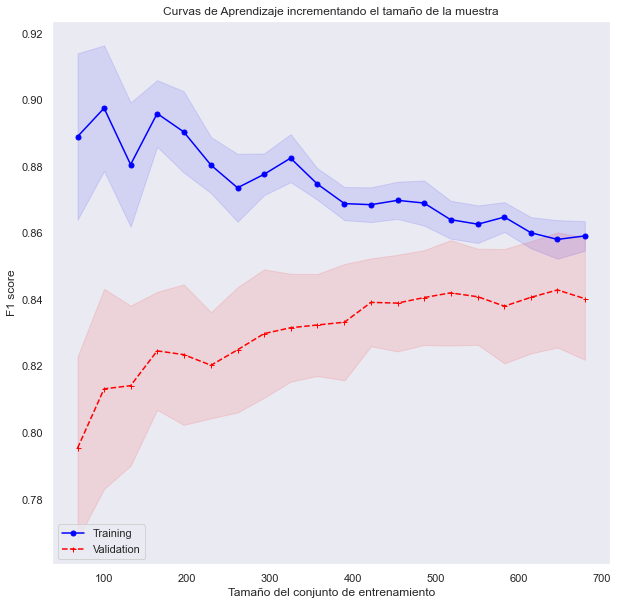

In [ ]:
modelo = LogisticRegression(max_iter=10000, random_state=11, C=1.0, class_weight=None, penalty='l2', solver='newton-cg')
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
metrica="F1 score"
tr_sizes, tr_scores, val_scores = learning_curve(
  estimator = pipeline ,    
  X = X_train,
  y = y_train,
  cv = kfold ,
  scoring=make_scorer(mi_f1),
  train_sizes = delta_train_sz,
  random_state=11
)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,metrica)

In [ ]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=11)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[1])])
lst_min_samples_split = [i for i in range(1, 11)]
param_grid = {
    'm__ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
    'm__criterion':['gini', 'entropy', 'log_loss'],
    'm__max_depth': max_depth,
    'm__min_samples_split': lst_min_samples_split,
    'm__class_weight': ['balanced', None]
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=kfold,
                    scoring=make_scorer(mi_precision))

grid.fit(X_train, y_train)

print('Mejor valor de precision obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de precision obtenido con la mejor combinación: 0.8867855033584722
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.0001, 'm__class_weight': 'balanced', 'm__criterion': 'entropy', 'm__max_depth': 2, 'm__min_samples_split': 2}
Métrica utilizada: make_scorer(mi_precision)


### ¿Cuál es la utilidad de la métrica “precision”?

Debido a que esta métrica se enfoca más en los falsos positivos que a los falsos negativos, es un buen indicador para saber que tan precisas son las predicciones postivas generadas por el modelo.
En el caso de este modelo "árbol de decisión la precisión obtenida de 0.88 aproximadamente nos indica que dicho modelo está haciendo un trabajo aceptable a la hora de generar las predicciones de créditos. Sin embargo, consideramos que sería importante realizar la métrica "Recall" para contrastar los resultados, esto depende del enfoque que el negocio defina.


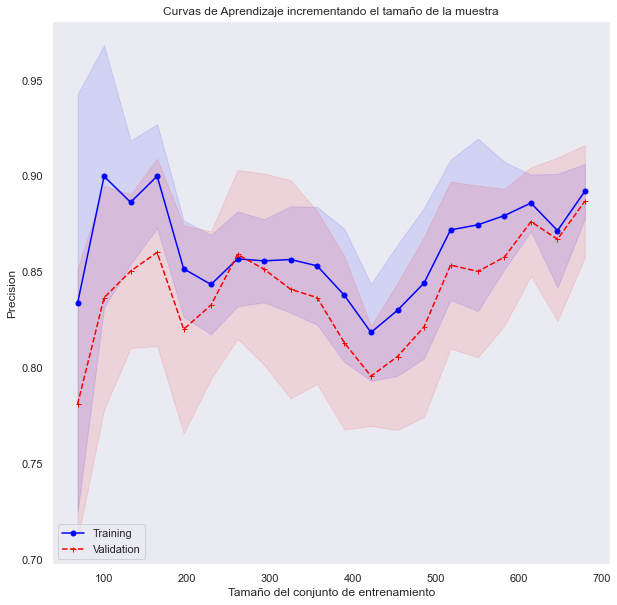

In [ ]:
modelo = DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced', criterion='entropy', max_depth=2, min_samples_split=2)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=11)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
metrica="Precision"
tr_sizes, tr_scores, val_scores = learning_curve(
  estimator = pipeline ,    
  X = X_train,
  y = y_train,
  cv = kfold ,
  scoring=make_scorer(mi_precision),
  train_sizes = delta_train_sz,
  random_state=11
)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,metrica)

In [ ]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=11)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[2])])

param_grid = {
    'm__ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
    'm__criterion':['gini', 'entropy', 'log_loss'],
    'm__max_depth': max_depth,
    'm__min_samples_split': [0.0001,0.01,0.1,1.0],
    'm__class_weight': ['balanced', None]
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=kfold,
                    scoring=make_scorer(mi_recall))

grid.fit(X_train, y_train)

print('Mejor valor de Recall obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)



Mejor valor de exactitud obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.0001, 'm__class_weight': None, 'm__criterion': 'gini', 'm__max_depth': 1, 'm__min_samples_split': 0.0001}
Métrica utilizada: make_scorer(mi_recall)


### ¿Cuál es la utilidad de la métrica “recall”?

La métrica Recall tambien conocida como exhaustividad que nos permite identificar el porcentaje de predicciones realizadas por el modelo que son valores positivos reales.
Es decir, se le más preferencia a los Falsos negativos que a los falsos positivos. En este caso vemos que el bosque aleatorio generado, presenta una métrica de recall de 1 por lo que estaría mostrando un comportamiento de sobreentrenamiento.


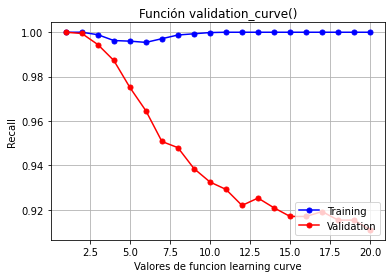

In [ ]:
modelo = RandomForestClassifier(ccp_alpha=0.0001, class_weight=None, criterion='gini', max_depth=1, min_samples_split=0.0001)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
max_depth = np.linspace(1,20,20, dtype="int")
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
metrica="Recall"
t_scores, v_scores = validation_curve(
    estimator= pipeline,
    X = X_train,
    y = y_train,
    param_name = "m__max_depth",
    param_range = max_depth,
    cv = kfold,
    scoring = make_scorer(mi_recall)
)
mi_validationCurvePlot(t_scores,v_scores,max_depth,metrica)

#**Ejercicio-6.**

In [ ]:
from imblearn.pipeline import Pipeline #Se ingresa este pipeline para el balanceo

# Modelo Final Regresión Logística

In [ ]:
modelo = LogisticRegression(max_iter=10000, random_state=11, C=1.0, class_weight=None, penalty='l2', solver='newton-cg')
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
smote = SMOTE()
pipeline = Pipeline(steps=[('smote', smote), ('ct',columnasTransformer), ('m',modelo)])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
modelo_reg = pipeline.fit(X_train,y_train)

results = modelo_reg.predict(X_val)

print(confusion_matrix(y_val, results))

print("F1: {}".format(mi_f1(y_val,results)))
print("Recall: {} ".format(mi_recall(y_val,results)))
print("Precision: {} ".format(mi_precision(y_val,results)))

[[34 18]
 [21 77]]
F1: 0.7979274611398963
Recall: 0.7857142857142857 
Precision: 0.8105263157894737 


### Conclusiones Regresión Logística

Durante el ejercicio el modelo de regresión logística fue el que resultados más consistentes nos dio, esto se evidencia durante los ejercidos 3,4,5 que aun usando los parámetros por defecto, no presento problemas de sobreentrenamiento o subentrenamiento. Como si lo presentaron los otros dos modelos desarrollados "árbol de decisión y random forest".
Sin embargo, concluidos que para mejores resultados es necesario el uso de los hiperparametros para evitar problemas como los obtenidos en el ejercicio 3 debido a que la convergencia no se podía lograr con los parámetros por default. 
Lo anterior a partir de las métricas (accuracy, recall, F1, precision, Gmean) obtenidas y los análisis desarrollados (curvas de aprendizaje y curvas de validación) fue el modelo que menos tiempo requirió para llegar a sus mejores hiperparametros.


# Modelo Final Decision Tree

In [ ]:
modelo = DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced', criterion='entropy', max_depth=2, min_samples_split=2)
smote = SMOTE()
pipeline = Pipeline(steps=[('smote', smote), ('ct',columnasTransformer), ('m',modelo)])
modelo_DT = pipeline.fit(X_train,y_train)

results = modelo_DT.predict(X_val)

print(confusion_matrix(y_val, results))

print("F1: {}".format(mi_f1(y_val,results)))
print("Recall: {} ".format(mi_recall(y_val,results)))
print("Precision: {} ".format(mi_precision(y_val,results)))

[[38 14]
 [31 67]]
F1: 0.7486033519553073
Recall: 0.6836734693877551 
Precision: 0.8271604938271605 


[Text(0.5, 0.8333333333333334, 'X[6] <= 0.5\nentropy = 1.0\nsamples = 1204\nvalue = [602, 602]'),
 Text(0.25, 0.5, 'X[11] <= 0.5\nentropy = 0.936\nsamples = 858\nvalue = [556, 302]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.88\nsamples = 740\nvalue = [519, 221]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.897\nsamples = 118\nvalue = [37, 81]'),
 Text(0.75, 0.5, 'X[37] <= 0.5\nentropy = 0.565\nsamples = 346\nvalue = [46, 300]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.924\nsamples = 56\nvalue = [19, 37]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.447\nsamples = 290\nvalue = [27, 263]')]

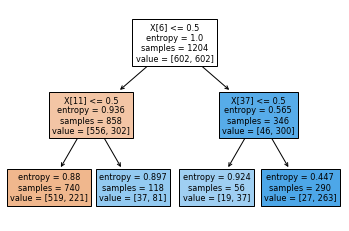

In [ ]:
tree.plot_tree(decision_tree=modelo, filled = True)

### Conclusiones Árbol de decisión
Concluimos que el modelo de árbol de decisión con la mejor combinación de hiperpametros, nos indica que el modelo está haciendo un buen trabajo de generalización sobre la información, que como explicamos anteriormente viene con una naturaleza desbalanceada (70% positivas-30% negativas) la cual nos forzó a usar algoritmos de balanceo como en este caso el SMOTE que fue el modelo elegido, dado que la diferencia entre las clases del desbalanceo empieza a mostrar resultados poco óptimos. Consideramos que el SMOTE es una buena técnica porque calcula un punto intermedio a partir de otros dos existentes y se enfoca en la clase minoritaria.

# Modelo Final Random Forest

In [ ]:
modelo = RandomForestClassifier(ccp_alpha=0.0001, class_weight=None, criterion='gini', max_depth=1, min_samples_split=0.0001)

smote = SMOTE()
pipeline = Pipeline(steps=[('smote', smote), ('ct',columnasTransformer), ('m',modelo)])

modelo_RF = pipeline.fit(X_train,y_train)

results = modelo_RF.predict(X_val)

print(confusion_matrix(y_val, results))

print("F1: {}".format(mi_f1(y_val,results)))
print("Recall: {} ".format(mi_recall(y_val,results)))
print("Precision: {} ".format(mi_precision(y_val,results)))

[[35 17]
 [20 78]]
F1: 0.8082901554404145
Recall: 0.7959183673469388 
Precision: 0.8210526315789474 


### Conclusiones Random Forest

Concluimos que el modelo random forest fue el que mejores métricas nos dio comparando con los otros modelos de predicción desarrollados:

Regresión logística:
* F1 RL: 0.7979274611398963
* Recall RL: 0.7857142857142857 
* Precision RL: 0.8105263157894737

Arbol de decisión:
* F1 DT: 0.7486033519553073
* Recall DT: 0.6836734693877551 
* Precision DT: 0.8271604938271605

Consideramos que este tipo de algoritmos aunque pueden llegar a tomar demasiado tiempo encontrar los mejores parámetros como en nuestro caso fueron 60 min aproximadamente son una buena opción a considerar sobre los modelos de clasificación, en especial sobre los árboles de decisión individuales. Lo que demuestra las ventajas de agrupar varios modelos en uno solo para mejores los desempeños.

###**Fin de la Actividad de la semana 6.**